In [1]:
!pip install --upgrade fastai
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate

    100% |████████████████████████████████| 163kB 11.2MB/s 
Requirement not upgraded as not directly required: pandas in /usr/local/lib/python3.6/site-packages (from fastai) (0.23.4)
Requirement not upgraded as not directly required: fastprogress>=0.1.18 in /usr/local/lib/python3.6/site-packages (from fastai) (0.1.18)
    100% |████████████████████████████████| 102kB 31.5MB/s 
Requirement not upgraded as not directly required: Pillow in /usr/local/lib/python3.6/site-packages (from fastai) (5.4.0)
Requirement not upgraded as not directly required: numexpr in /usr/local/lib/python3.6/site-packages (from fastai) (2.6.9)
Requirement not upgraded as not directly required: pyyaml in /usr/local/lib/python3.6/site-packages (from fastai) (3.13)
Requirement not upgraded as not directly required: requests in /usr/local/lib/python3.6/site-packages (from fastai) (2.21.0)
Requirement not upgraded as not directly required: scipy in /usr/local/lib/python3.6/site-packages (from fastai) (1.2.0)
Requirem

In [2]:
path = Path('/floyd/home/data/')
knives = fnames = get_image_files(path)
print(knives[:5])

[PosixPath('/floyd/home/data/notknife_3198.bmp'), PosixPath('/floyd/home/data/notknife_2790.bmp'), PosixPath('/floyd/home/data/notknife_2296.bmp'), PosixPath('/floyd/home/data/notknife_8269.bmp'), PosixPath('/floyd/home/data/notknife_5795.bmp')]


In [3]:
pat = r'/([^/]+)_\d+.bmp$'

In [4]:
data = (ImageDataBunch
        .from_name_re(path,
                      knives,
                      pat,
                      ds_tfms=get_transforms(),
                      size=224,
                      bs=64)
	.normalize(imagenet_stats))

['knife', 'notknife']


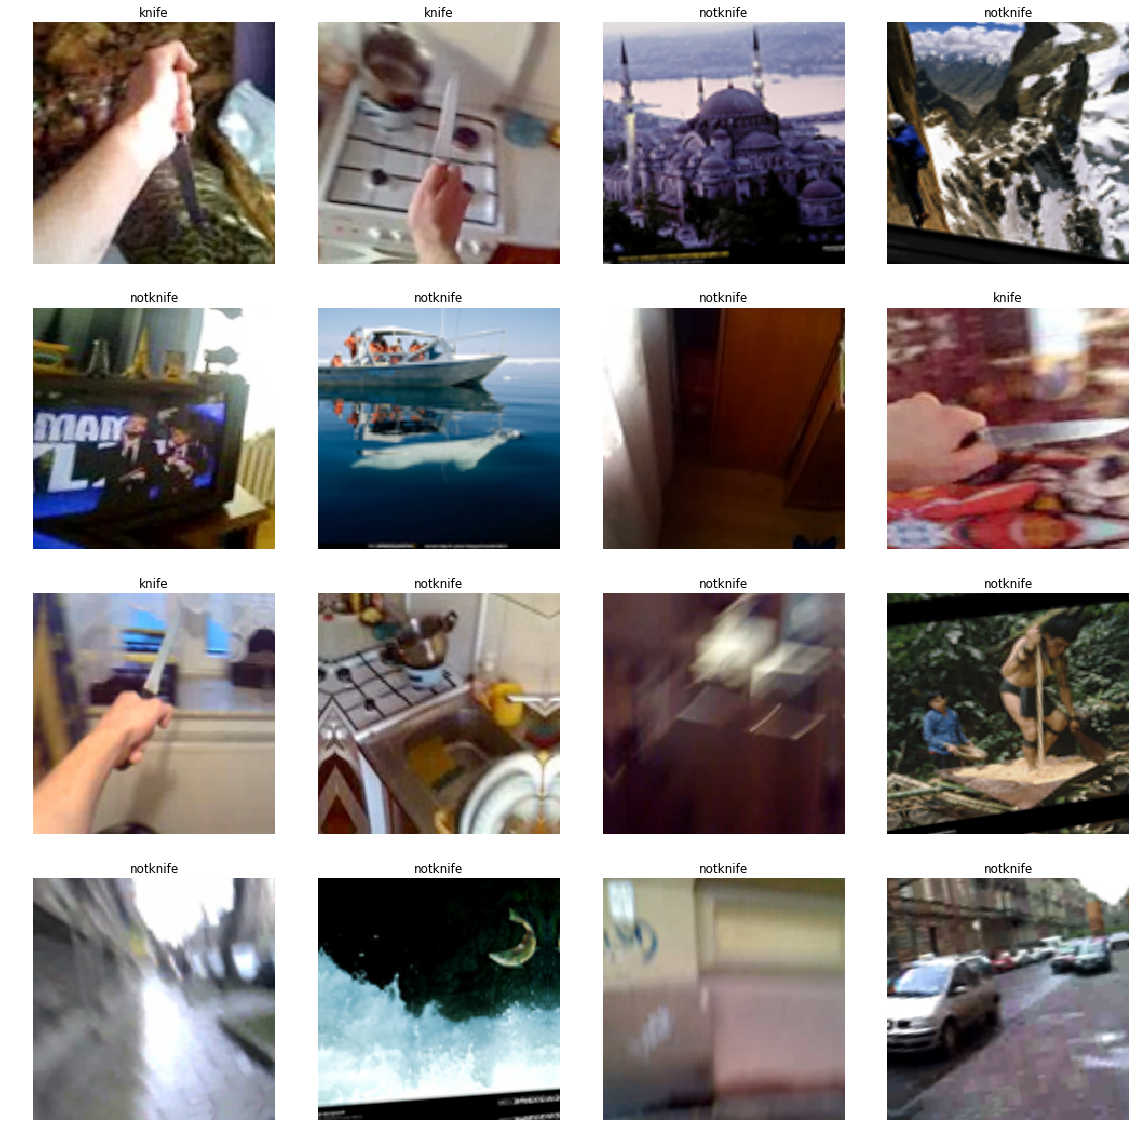

In [5]:
data.show_batch(rows=4)
print(data.classes)

In [6]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)
learn.fit_one_cycle(4)
learn.save('knives-stage-1')


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 91807845.73it/s]


epoch,train_loss,valid_loss,error_rate
1,0.158432,0.063633,0.020894
2,0.064779,0.034570,0.012119
3,0.040913,0.019557,0.006268
4,0.025303,0.017205,0.005433


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


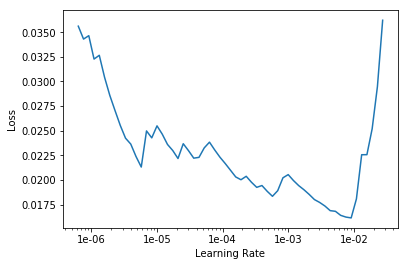

In [8]:
learn.lr_find()
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(10, max_lr=slice(1e-03,1e-02))
learn.save('knives-stage-2')

epoch,train_loss,valid_loss,error_rate
1,0.031050,0.018738,0.005433
2,0.029380,0.040244,0.009611
3,0.040095,0.028016,0.005015
4,0.027003,0.022205,0.004597
5,0.025842,0.010071,0.001672
6,0.024286,0.039495,0.009193
7,0.012359,0.008150,0.002507
8,0.004851,0.006673,0.001254
9,0.003144,0.005253,0.001672
10,0.002792,0.004225,0.001672


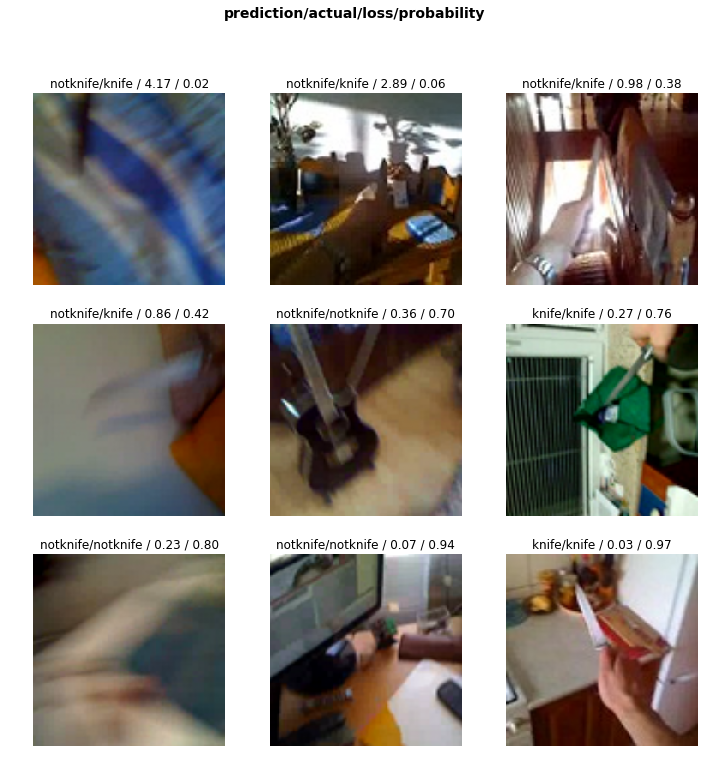

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9)